# Лабораторная работа 1

Выполнил: Кузьмин Роман, ИУ5-25М

Датасет: [Restaurant Tips Dataset](https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats

### Описание датасета

7 колонок
1. Общая сумма счета в долларах
2. Сумма чаевых в долларах
3. Пол человека, оплачивающего счет (мужчина/женщина)
4. Курильщик, является ли этот человек курильщиком (Да/Нет)
5. День недели, когда была совершена транзакция (Чт/Пт/Сб/Вс)
6. Время, время суток, когда была совершена транзакция (обед/ужин)
7. Количество участников (количество человек)

In [ ]:
data = pd.read_csv('tips.csv', sep=",")

In [ ]:
# Первые 5 строк датасета
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
data.shape

(244, 7)

In [ ]:
data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [ ]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

total_bill - 0
tip - 0
sex - 0
smoker - 0
day - 0
time - 0
size - 0


In [ ]:
# Основные статистические характеристки набора данных
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Визуальный анализ

### Гистограмма
Позволяет оценить плотность вероятности распределения данных. Строим только по числовым параметрам

<ipython-input-9-6945ce53eb72>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numeric[col])
<ipython-input-9-6945ce53eb72>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numeric[col])
<ipython-input-9-6945ce53eb72>:4: UserWarning: 

`distplot` is a deprecated function and will be r

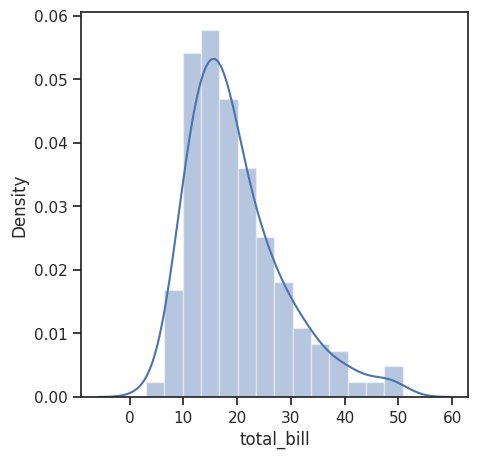

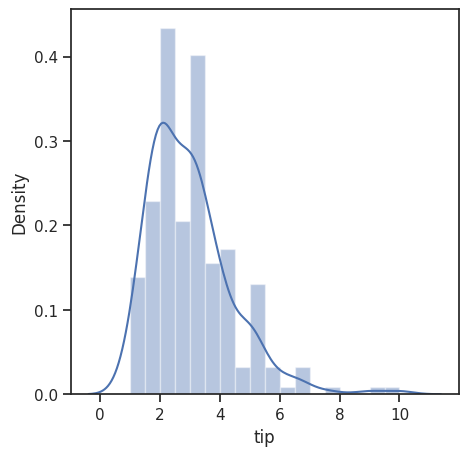

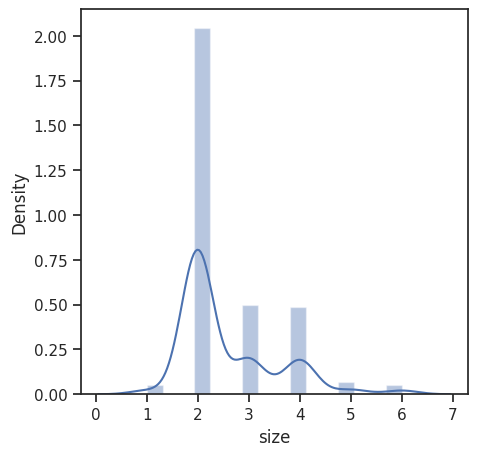

In [ ]:
data_numeric = data.drop(columns=['sex', 'smoker', 'day', 'time'])
for col in data_numeric:
    fig, ax = plt.subplots(figsize=(5,5))
    sns.distplot(data_numeric[col])

Видно, что у стоимости обеда и чаевых распределение, близкое к нормальному, а в количестве человек за столом преобладают пары.

### диаграммы рассяния
pairplot - комбинация гистограмм и диаграмм рассеяния

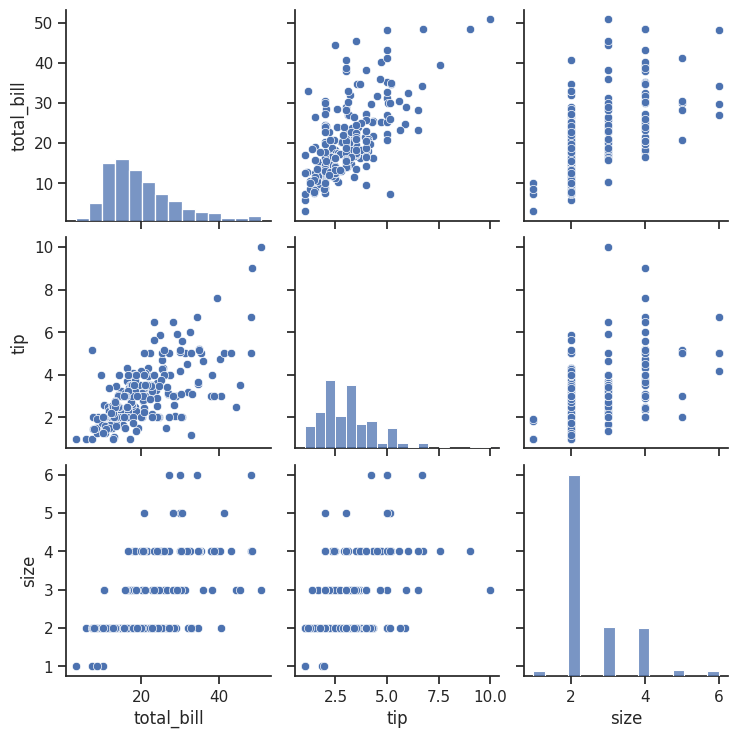

In [ ]:
sns.pairplot(data)

На диаграммах рассеяния можно заметить корреляции между значениями, приблизительно линейные

Теперь выполним шаги data-to-vis для multiple numerical:
boxplot ->
violin plot ->
ridgeline ->
heatmap

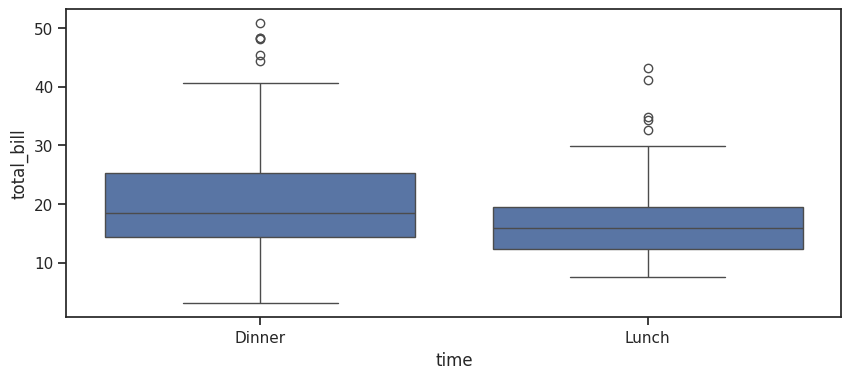

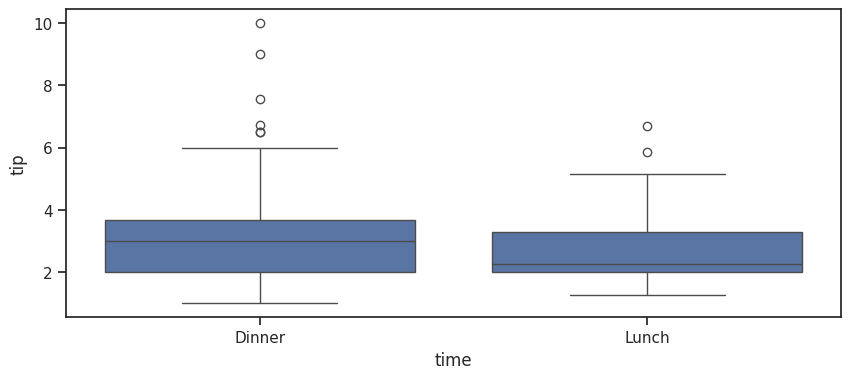

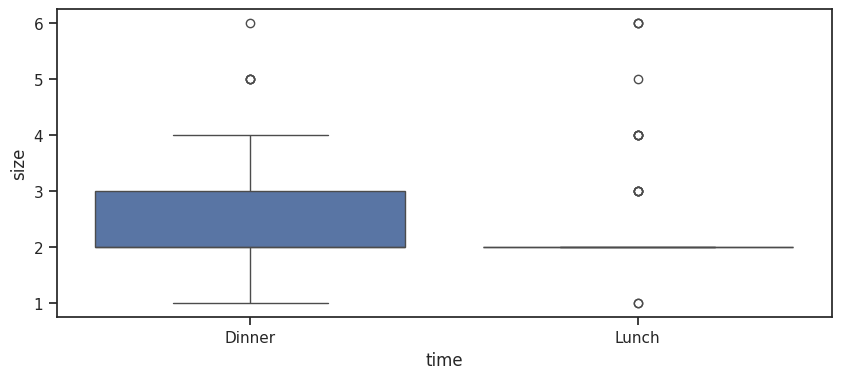

In [ ]:
for col in data_numeric:
    fig, ax = plt.subplots(figsize=(10,4))
    sns.boxplot(x='time', y=col, data=data)

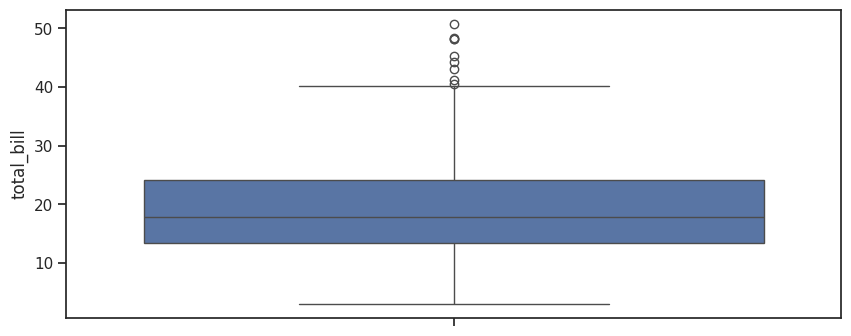

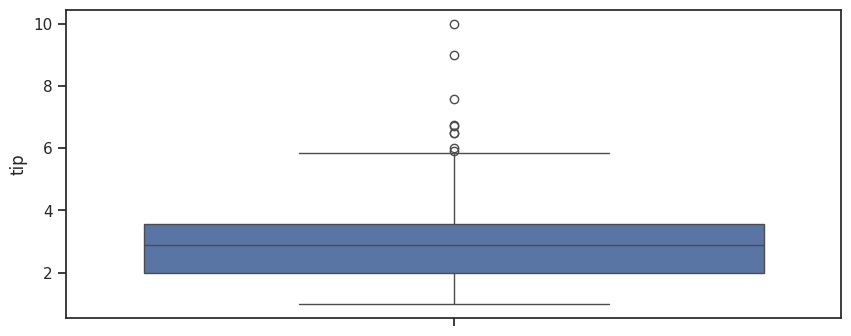

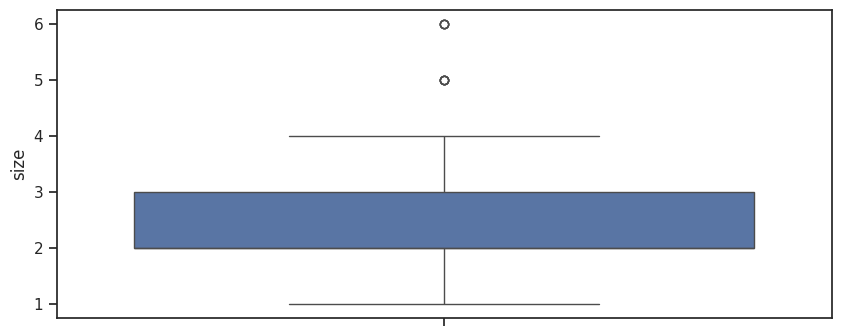

In [ ]:
for col in data_numeric:
    fig, ax = plt.subplots(figsize=(10,4))
    sns.boxplot(y=col, data=data)

boxplot показывает распределение и квартили для значений.

Видно, что за ужин в среднем платят чуть больше и соответственно чаевые тоже больше. А по количеству людей видно, что обедают почти всегда вдвоем

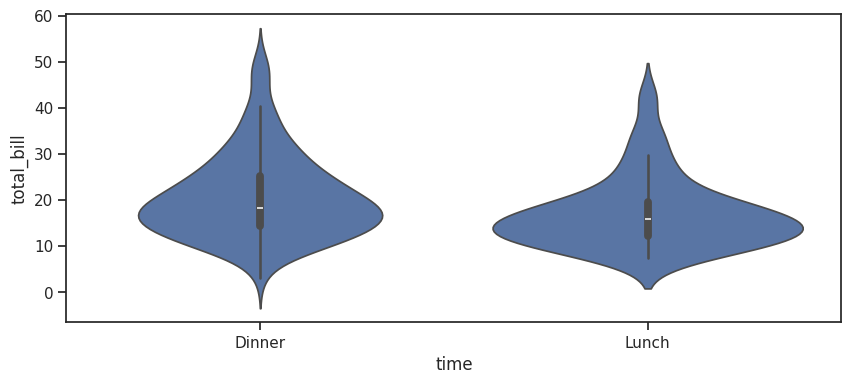

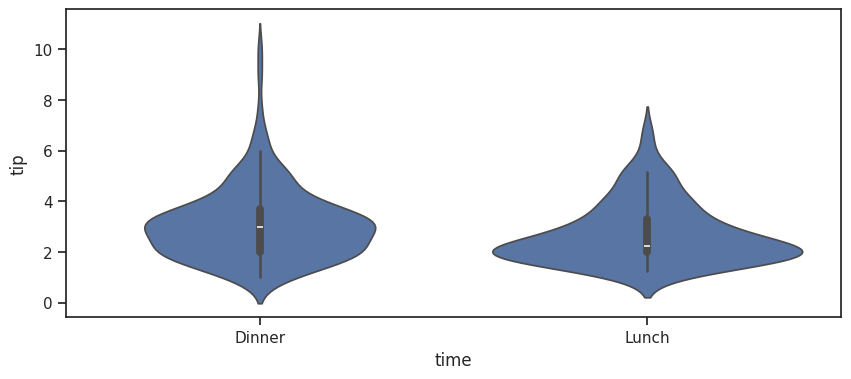

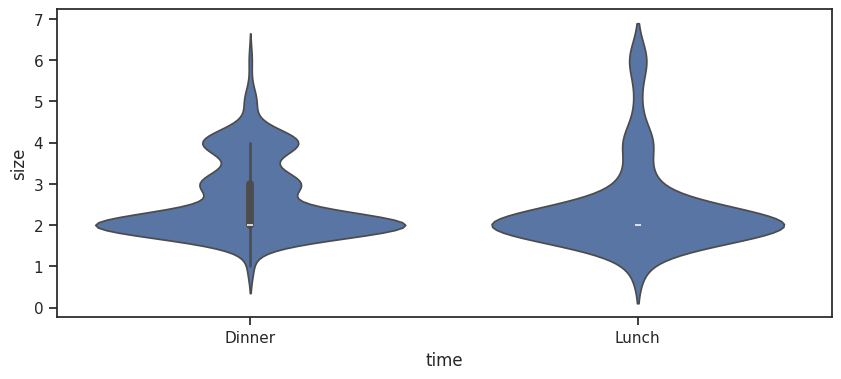

In [ ]:
for col in data_numeric:
    fig, ax = plt.subplots(figsize=(10,4))
    sns.violinplot(x='time', y=col, data=data.loc[data['time'].isin(['Lunch', 'Dinner'])])

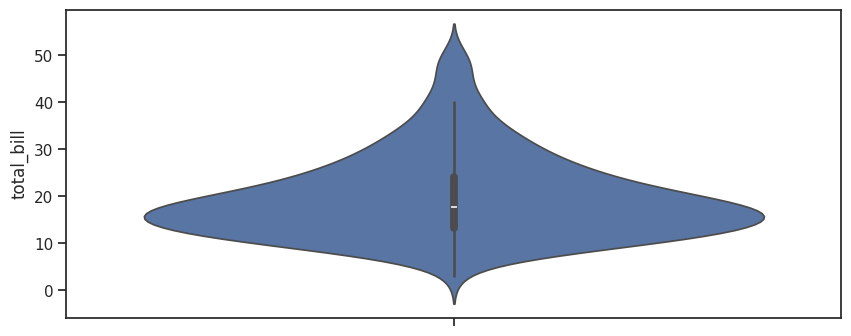

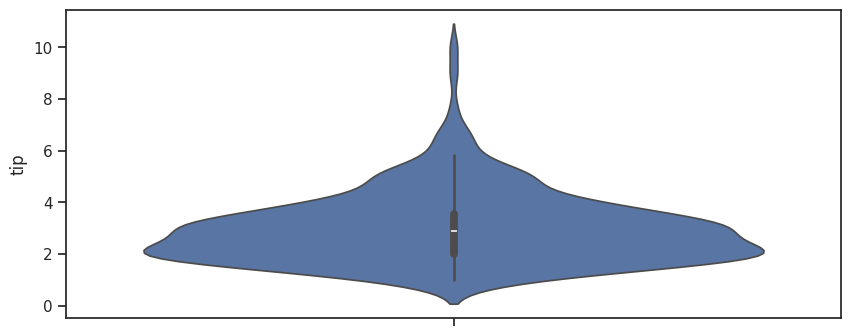

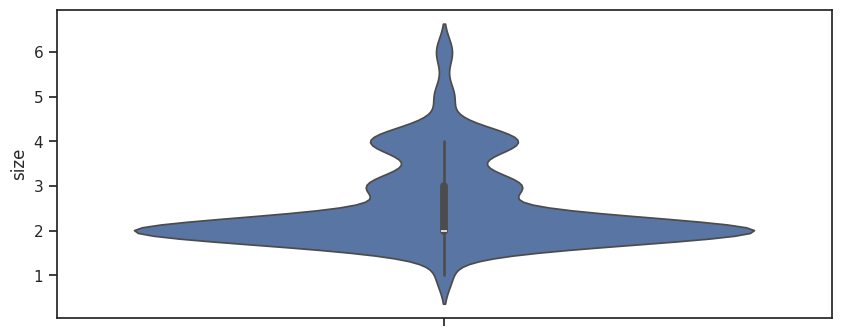

In [ ]:
for col in data_numeric:
    fig, ax = plt.subplots(figsize=(10,4))
    sns.violinplot( y=col, data=data)

На violinplot видно одинаковое распределение, близкое к нормальному для суммы обеда и чаевых

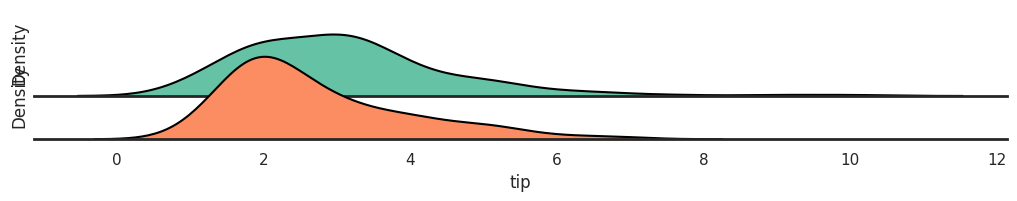

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth' :2})
palette = sns.color_palette("Set2", 12)
g = sns. FacetGrid( data, palette=palette, row="time", hue="time", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="tip", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="tip", color='black')
def label(x, color, label):
    ах = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
    ha="left", va="center", transform=ax. transAxes)
g.map(label, "tip")
g.fig.subplots_adjust ( hspace=-.5)
g.set_titles ("")
g.set(yticks= [], xlabel="tip")
g.despine(left=True)

Видим опять околоноромальное распределение. Выбросы в данных - обеды с большими чаевыми (и самой стоимостью скорее всего)

In [ ]:
data['sex'] = data['sex'].astype('category')
data['day'] = data['day'].astype('category')
data['time'] = data['time'].astype('category')
data['smoker'] = data['smoker'].astype('category')

cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

<Axes: >

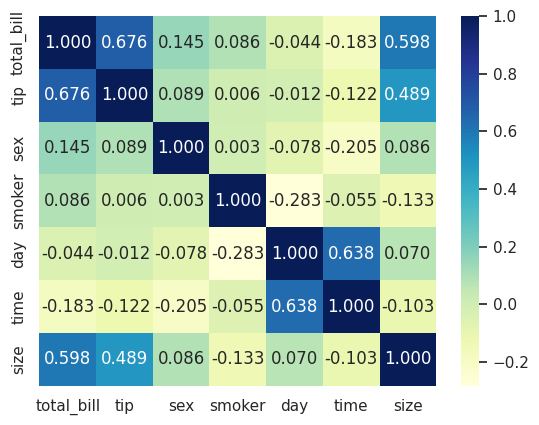

In [ ]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

Чаевые и сумма счета понятным образом скоррелированы между собой. Пол также влияет на сумму заказа и чаевые. Пол немного коррелирует с размером компании, можно предположить, что в парных обедах чаще платит мужчина, отсюда и корреляция.